Tiempo de ejecucion: 0.25448416699509835 segundos


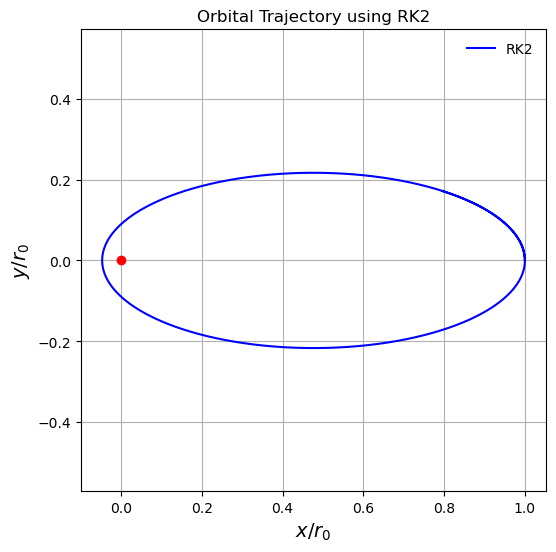

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Constantes
L = 3
N = 25000
h = L / N

# Inicializamos arreglos
x = np.zeros(N + 1)
y = np.zeros(N + 1)
vx = np.zeros(N + 1)
vy = np.zeros(N + 1)
K_RK2 = np.zeros(N + 1)
U_RK2 = np.zeros(N + 1)
E_RK2 = np.zeros(N + 1)
t = np.linspace(0, L, N + 1)

# Condiciones iniciales
x[0], y[0] = 1.0, 0.0
vx[0], vy[0] = 0.0, 0.3

# Energias iniciales
r0_sq = x[0]**2 + y[0]**2
K_RK2[0] = 0.5 * (vx[0]**2 + vy[0]**2)
U_RK2[0] = -1.0 / np.sqrt(r0_sq)
E_RK2[0] = K_RK2[0] + U_RK2[0]

start = time.perf_counter()

# implementacion de RK2
for i in range(N):
    r_sq = x[i]**2 + y[i]**2
    r_3_2 = r_sq ** 1.5

    # evaluamos k1
    ax1 = -x[i] / r_3_2
    ay1 = -y[i] / r_3_2
    k1vx = h * ax1
    k1vy = h * ay1
    k1x = h * vx[i]
    k1y = h * vy[i]

    # puntos medios
    x_half = x[i] + 0.5 * k1x
    y_half = y[i] + 0.5 * k1y
    vx_half = vx[i] + 0.5 * k1vx
    vy_half = vy[i] + 0.5 * k1vy

    r_half_sq = x_half**2 + y_half**2
    r_half_3_2 = r_half_sq ** 1.5

    # evaluamos k2
    ax2 = -x_half / r_half_3_2
    ay2 = -y_half / r_half_3_2
    k2vx = h * ax2
    k2vy = h * ay2
    k2x = h * vx_half
    k2y = h * vy_half

    # actualizamos posiciones y velocidades
    x[i+1] = x[i] + k2x
    y[i+1] = y[i] + k2y
    vx[i+1] = vx[i] + k2vx
    vy[i+1] = vy[i] + k2vy

    # actualizamos las energias
    v_sq = vx[i+1]**2 + vy[i+1]**2
    r_sq = x[i+1]**2 + y[i+1]**2
    K_RK2[i+1] = 0.5 * v_sq
    U_RK2[i+1] = -1.0 / np.sqrt(r_sq)
    E_RK2[i+1] = K_RK2[i+1] + U_RK2[i+1]

end = time.perf_counter()

print('Tiempo de ejecucion:', end - start, 'segundos')

# graficamos la orbita
plt.figure(figsize=(6, 6))
plt.plot(x, y, color='blue', label='RK2')
plt.xlabel("$x/r_0$", fontsize=14)
plt.ylabel("$y/r_0$", fontsize=14)
plt.legend(loc='upper right', frameon=False)
plt.plot(0.0, 0.0, 'ro')  # Center of attraction
plt.axis('equal')
plt.title("Orbital Trajectory using RK2")
plt.grid(True)
plt.show()

(-1.0, -0.9)

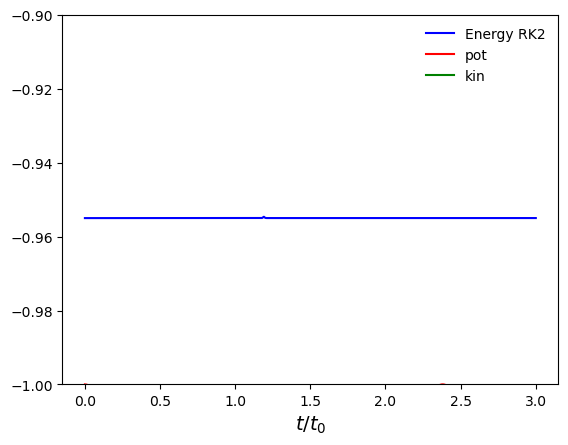

In [10]:
# chequeamos conservacion de energia
plt.plot(t,E_RK2,color='blue', label='Energy RK2')
plt.plot(t,U_RK2,color='red', label='pot')
plt.plot(t,K_RK2,color='green', label='kin')
plt.xlabel("$t/t_0$",fontsize=14)
plt.legend(loc='upper right', frameon=False)
plt.ylim(-1.,-0.9)

Tiempo de ejecucion: 0.031720958002551924 segundos
Pasos totales: 1646


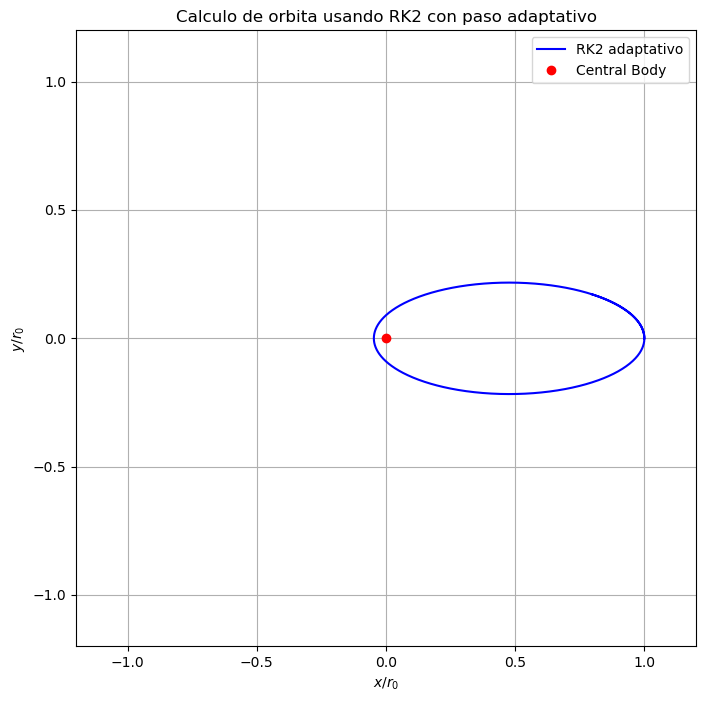

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Constantes
L = 3.0
N = 1000  # esto sirve para determinar el h inicial, pero será inmediatamente corregido (da lo mismo)
h = L / N  
rtol = 1e-6
atol = 1e-9

# paso de RK2
def rk2_step(x, y, vx, vy, h):
    r2 = x**2 + y**2
    r3 = r2 ** 1.5
    ax = -x / r3
    ay = -y / r3

    k1vx = h * ax
    k1vy = h * ay
    k1x = h * vx
    k1y = h * vy

    x_half = x + 0.5 * k1x
    y_half = y + 0.5 * k1y
    vx_half = vx + 0.5 * k1vx
    vy_half = vy + 0.5 * k1vy

    r2_half = x_half**2 + y_half**2
    r3_half = r2_half ** 1.5
    ax_half = -x_half / r3_half
    ay_half = -y_half / r3_half

    k2vx = h * ax_half
    k2vy = h * ay_half
    k2x = h * vx_half
    k2y = h * vy_half

    return x + k2x, y + k2y, vx + k2vx, vy + k2vy

# calculamos las energias
def compute_quantities(x, y, vx, vy):
    r = np.sqrt(x**2 + y**2)
    kinetic = 0.5 * (vx**2 + vy**2)
    potential = -1.0 / r
    energy = kinetic + potential
    return kinetic, potential, energy

# Inicializamos los arreglos
max_steps = 100 * N + 1
x_arr = np.empty(max_steps)
y_arr = np.empty(max_steps)
vx_arr = np.empty(max_steps)
vy_arr = np.empty(max_steps)
K_arr = np.empty(max_steps)
U_arr = np.empty(max_steps)
E_arr = np.empty(max_steps)
t_arr = np.empty(max_steps)

# calculamos condiciones iniciales
x_arr[0], y_arr[0] = 1.0, 0.0
vx_arr[0], vy_arr[0] = 0.0, 0.3
K_arr[0], U_arr[0], E_arr[0] = compute_quantities(x_arr[0], y_arr[0], vx_arr[0], vy_arr[0])
t_arr[0] = 0.0

start = time.perf_counter()
i = 0
tempo = 0.0

# aca hacemos el doblamiento de paso
while tempo < L:
    # primer paso RK2 
    x1, y1, vx1, vy1 = rk2_step(x_arr[i], y_arr[i], vx_arr[i], vy_arr[i], h)
    K1, U1, E1 = compute_quantities(x1, y1, vx1, vy1)

    # segundo paso RK2
    x2, y2, vx2, vy2 = rk2_step(x1, y1, vx1, vy1, h)
    K2, U2, E2 = compute_quantities(x2, y2, vx2, vy2)

    # paso doble de RK2 (2h total)
    x_big, y_big, vx_big, vy_big = rk2_step(x_arr[i], y_arr[i], vx_arr[i], vy_arr[i], 2 * h)

    # estimacion del error
    deltax = (x2 - x_arr[i]) - (x_big - x_arr[i])
    deltay = (y2 - y_arr[i]) - (y_big - y_arr[i])
    deltavx = (vx2 - vx_arr[i]) - (vx_big - vx_arr[i])
    deltavy = (vy2 - vy_arr[i]) - (vy_big - vy_arr[i])

    scalex = atol + abs(max(x_arr[i],x1)) * rtol
    scaley = atol + abs(max(y_arr[i],y1)) * rtol
    scalevx = atol + abs(max(vx_arr[i],vx1)) * rtol
    scalevy = atol + abs(max(vy_arr[i],vy1)) * rtol

    err = np.sqrt(0.25 * ((deltax / scalex)**2 + (deltay / scaley)**2 +
                          (deltavx / scalevx)**2 + (deltavy / scalevy)**2))

    # guardamos el primer paso
    x_arr[i+1], y_arr[i+1] = x1, y1
    vx_arr[i+1], vy_arr[i+1] = vx1, vy1
    K_arr[i+1], U_arr[i+1], E_arr[i+1] = K1, U1, E1
    t_arr[i+1] = t_arr[i] + h

    # guardamos el segundo paso
    x_arr[i+2], y_arr[i+2] = x2, y2
    vx_arr[i+2], vy_arr[i+2] = vx2, vy2
    K_arr[i+2], U_arr[i+2], E_arr[i+2] = K2, U2, E2
    t_arr[i+2] = t_arr[i+1] + h

    # ajuste adaptativo del paso (que valdrá para la siguiente iteración)
    h = h / err**(1/3)

    i += 2
    tempo = t_arr[i]

end = time.perf_counter()

# cortamos la parte de los arreglos que tienen ceros
x_arr = x_arr[:i+1]
y_arr = y_arr[:i+1]
vx_arr = vx_arr[:i+1]
vy_arr = vy_arr[:i+1]
K_arr = K_arr[:i+1]
U_arr = U_arr[:i+1]
E_arr = E_arr[:i+1]
t_arr = t_arr[:i+1]

print('Tiempo de ejecucion:', end - start, 'segundos')
print('Pasos totales:', i)

# Plot
plt.figure(figsize=(8, 8))
plt.plot(x_arr, y_arr, label='RK2 adaptativo', color='blue')
plt.plot(0, 0, 'ro', label='Central Body')
plt.xlabel("$x/r_0$")
plt.ylabel("$y/r_0$")
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend()
plt.grid(True)
plt.title("Calculo de orbita usando RK2 con paso adaptativo")
plt.show()

(-1.0, -0.9)

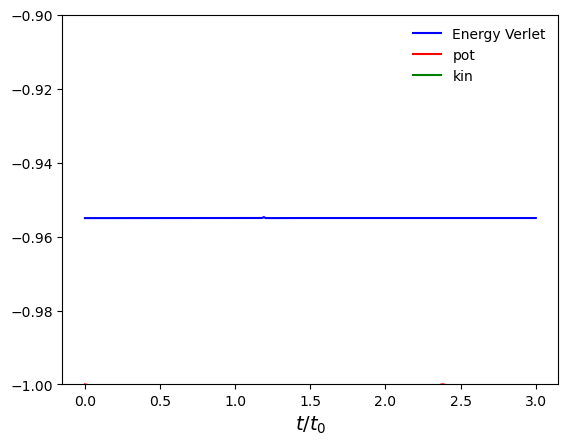

In [15]:
plt.plot(t_arr,E_arr,color='blue', label='Energy Verlet')
plt.plot(t_arr,U_arr,color='red', label='pot')
plt.plot(t_arr,K_arr,color='green', label='kin')
plt.xlabel("$t/t_0$",fontsize=14)
plt.legend(loc='upper right', frameon=False)
plt.ylim(-1.,-.9)